# Wheat Future Market Analysis Report

## Market Info
#### Symbol Convention
[Base Symbol]+[Month Code]+[Year]

- For example, ```ZWN25``` is the Chicago soft red winter wheat future with expiration in July 2025.
- ```ZW=F``` refers to the **nearest to expiration** Chicago soft red winter wheat futures contract. For example, from March to April, the ```ZW=F``` tracks the May futures ```ZWK```.

#### Quick Summary

| Wheat Type                | Symbol | Key Growing Regions    | Primary Uses                       | Planting Season | Harvest Season | Vulnerable to                              | Expiry Month                           |
|---------------------------|--------|------------------------|------------------------------------|-----------------|----------------|--------------------------------------------|----------------------------------------|
| **Soft Red Winter Wheat** | `ZW`   | IL, IN, OH, MO, KY     | Pastries, cakes, cookies           | Sep-Nov         | May-Jul        | cold damage & drought                      | Mar, May, Jul, Sep, Dec (H, K, N, U Z) |
| **Hard Red Winter Wheat** | `KE`   | Central U.S. (Plains)  | Bread, rolls, all-purpose flour    | Sep-Oct         | Jun-Jul        | cold damage & drought                      | Mar, May, Jul, Sep, Dec (H, K, N, U Z) |
| **Hard Red Spring Wheat** | `MW`   | Northern U.S. & Canada | Premium bread, bagels, pizza dough | Apr-May         | Aug-Sep        | wet planting conditions summer heat stress | Mar, May, Jul, Sep, Dec (H, K, N, U Z) |

#### Geopolitical & Export Demand
- Hard Red Winter & Spring Wheat are key U.S. exports (buyers include China, Mexico, and Egypt).
- Russia and Ukraine produce competing wheat types, affecting global prices.

#### Last trading day
- The business day before the 15th calendar day of the contract month. Usually, it would be the 14th of that day at 1:20pm CT.
- The wheat is already in the warehouse before the expiration date. Once the ownership is transferred to the long trader, the long trader must pay the storage fees.
- After the last trading day, the buyer of the contract must take delivery. This will incur daily warehouse fee, handling fees and delivery fees.
- Most trades will close their positions before the First Notice day, or the last trading day.

In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import numpy as np
from scipy.signal import periodogram
from src.data.preprocess import extend_market_data
from pandas.tseries.offsets import BDay

##%% md
## Market Data Analysis (SRW)
##%%
# Obtaining the nearest to expiration wheat future

HRW = yf.Ticker("KE=F")

In [2]:
HRW_data = HRW.history(start ="2014-01-01", end ="2024-12-31").drop(['Dividends', 'Stock Splits'], axis=1)

SRW_data = extend_market_data(SRW_data)
HRW_data = extend_market_data(HRW_data)


##%%
SRW_data
##%%
HRW_data
##%% md
### Trading Volume Analysis
##%%
plt.figure(figsize = (16,6))

,Open,High,Low,Close,Volume,Year,Month,Day,Day_Of_Year,expiry,...,High-Close,Low-Close,TR,14D_ATR,Volume_Volatility_Ratio,14D_RSI,7D_MA,14D_MA,7D_EMA,14D_EMA
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,605.00,605.25,595.50,597.00,39720,2014,1,2,2,2014-03-14,...,NaN,NaN,9.75,NaN,NaN,NaN,NaN,NaN,597.000000,597.000000
2014-01-03,596.75,609.00,596.00,605.75,49188,2014,1,3,3,2014-03-14,...,12.00,1.00,13.00,NaN,NaN,NaN,NaN,NaN,599.187500,598.166667
2014-01-06,608.00,612.75,605.00,605.75,39432,2014,1,6,6,2014-03-14,...,7.00,0.75,7.75,NaN,NaN,NaN,NaN,NaN,600.828125,599.177778
2014-01-07,606.50,610.00,601.75,602.50,45799,2014,1,7,7,2014-03-14,...,4.25,4.00,8.25,NaN,NaN,NaN,NaN,NaN,601.246094,599.620741
2014-01-08,603.00,607.25,586.75,588.75,55310,2014,1,8,8,2014-03-14,...,4.75,15.75,20.50,NaN,NaN,NaN,NaN,NaN,598.122070,598.171309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,533.00,544.00,533.00,540.50,57507,2024,12,23,358,2025-03-14,...,11.00,0.00,11.00,10.428571,3.549087e+06,52.265861,538.464286,540.142857,538.490838,539.786801
2024-12-24,539.50,541.50,533.50,534.75,25215,2024,12,24,359,2025-03-14,...,1.00,7.00,8.00,10.625000,1.531716e+06,48.137536,539.642857,539.910714,537.555628,539.115228
2024-12-26,534.75,544.00,533.75,541.00,28461,2024,12,26,361,2025-03-14,...,9.25,1.00,10.25,10.553571,1.761868e+06,46.607670,538.357143,539.500000,538.416721,539.366531


In [ ]:

for year in SRW_data['Year'].unique():  # Loop through each unique year
    yearly_data = SRW_data[SRW_data['Year'] == year]
    sns.lineplot(x = 'Date', y = 'Volume', data = yearly_data)
plt.show()

plt.figure(figsize = (16,6))
sns.lineplot(x = 'Day_Of_Year', y = 'Volume', data = SRW_data, hue ='Year', palette='Set1')
plt.show()

plt.figure(figsize = (16,6))
sns.lineplot(x = 'DTE', y = 'Volume', data = SRW_data)
plt.show()
##%% md

- At the expiry date, traders with open positions need to exit their contracts before the last trading day unless they plan for physical delivery. Many speculative traders close positions to avoid delivery obligations. This leads to a surge in trading volume.
##%%
monthly_average = SRW_data.groupby(['Year', 'Month']).Volume.agg('mean').reset_index()


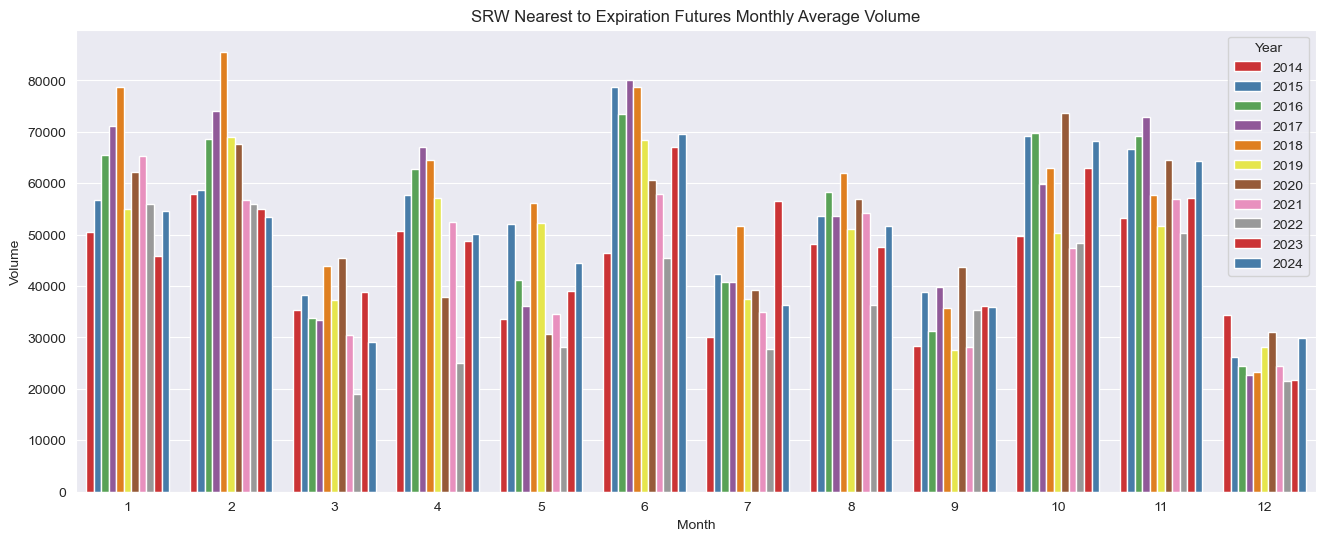

In [11]:
plt.title("SRW Nearest to Expiration Futures Monthly Average Volume")
sns.barplot(x = 'Month', y = 'Volume', data = monthly_average, hue = 'Year', palette='Set1')
# sns.barplot(x = 'Month', y = 'Volume', data = monthly_average)
plt.show()
##%% md

##%% md
### Price Analysis
##%%
plt.figure(figsize = (16,9))
plt.title("SRW Nearest to Expiration Future Close Price")

for year in SRW_data['Year'].unique():  # Loop through each unique year
    yearly_data = SRW_data[SRW_data['Year'] == year]
    sns.lineplot(x = 'Date', y = 'Close', data = yearly_data)
plt.savefig('../imgs/wheat/price.png')
plt.show()

plt.figure(figsize = (16,6))
sns.lineplot(x = 'Day_Of_Year', y = 'Close', data = SRW_data, hue ='Year', palette='Set1')
plt.show()
##%%
plt.figure(figsize = (16,6))

count    2764.000000
mean       -0.000031
std         0.019755
min        -0.112971
25%        -0.012188
50%        -0.000549
75%         0.011293
max         0.197014
Name: Log_Return, dtype: float64


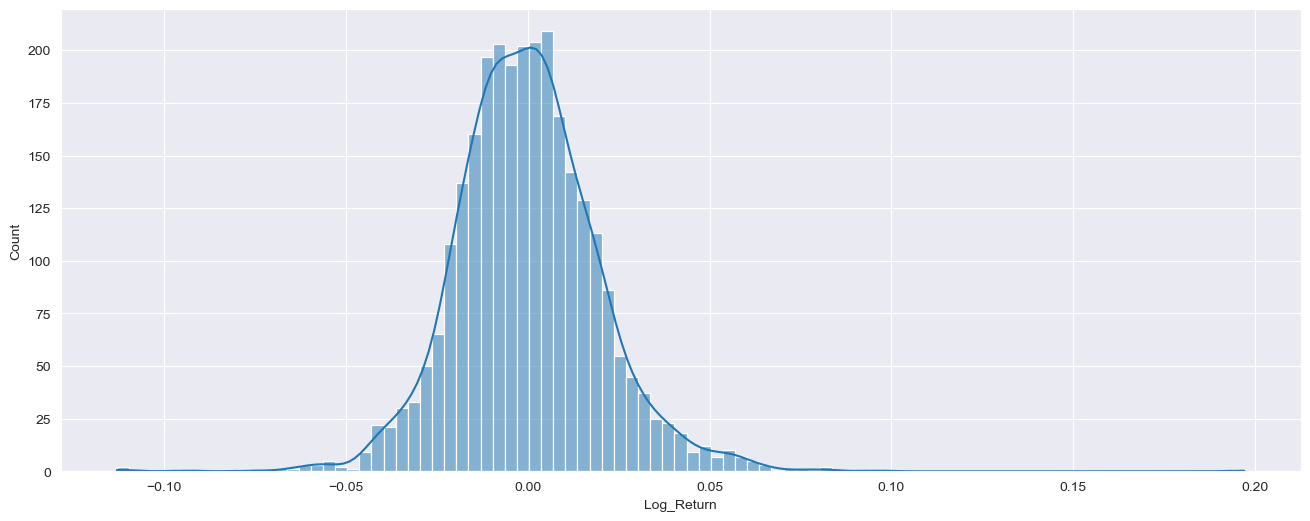

In [13]:
print(SRW_data['Log_Return'].describe())
##%% md

##%%
frequencies, power = periodogram(SRW_data['Close'].dropna())


C:\Users\tianhao\AppData\Local\Temp\ipykernel_27268\3862331610.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1 / frequencies, power)


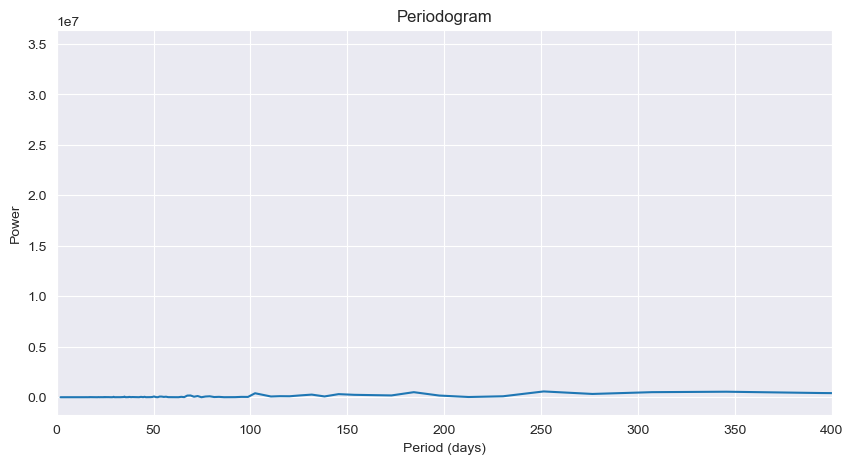

In [14]:
plt.plot(1 / frequencies, power)
plt.xlabel("Period (days)")
plt.ylabel("Power")
plt.title("Periodogram")
plt.xlim(0, 400)  # Limit x-axis to reasonable periods
plt.show()
##%% md
# SRW, HRW comparison
##%%
plt.figure(figsize=(16, 6))

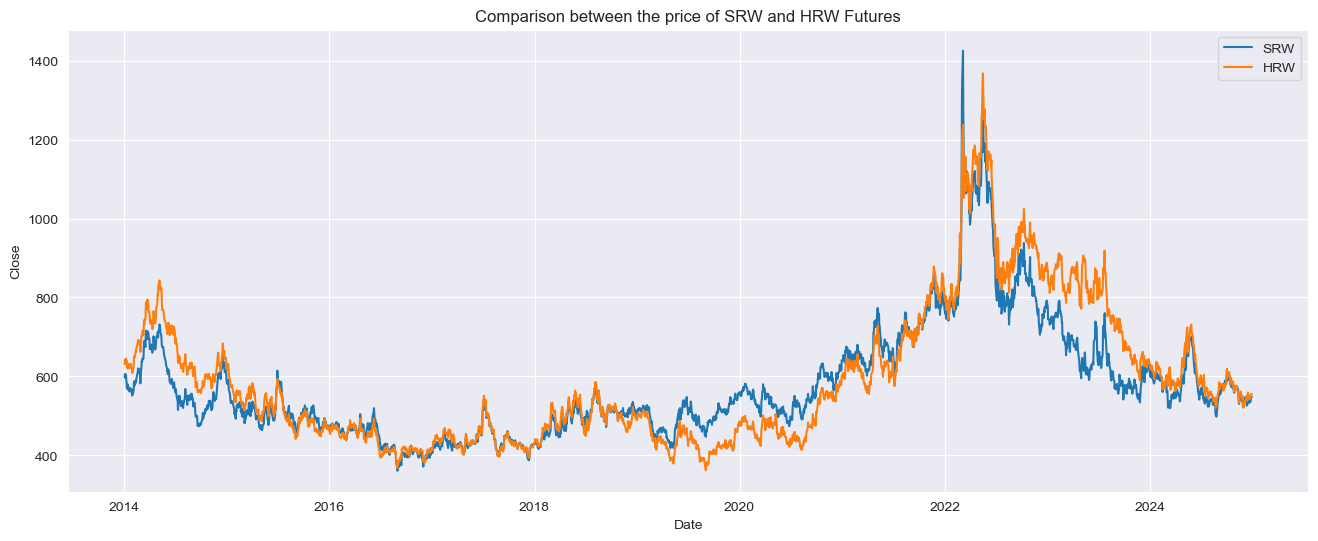

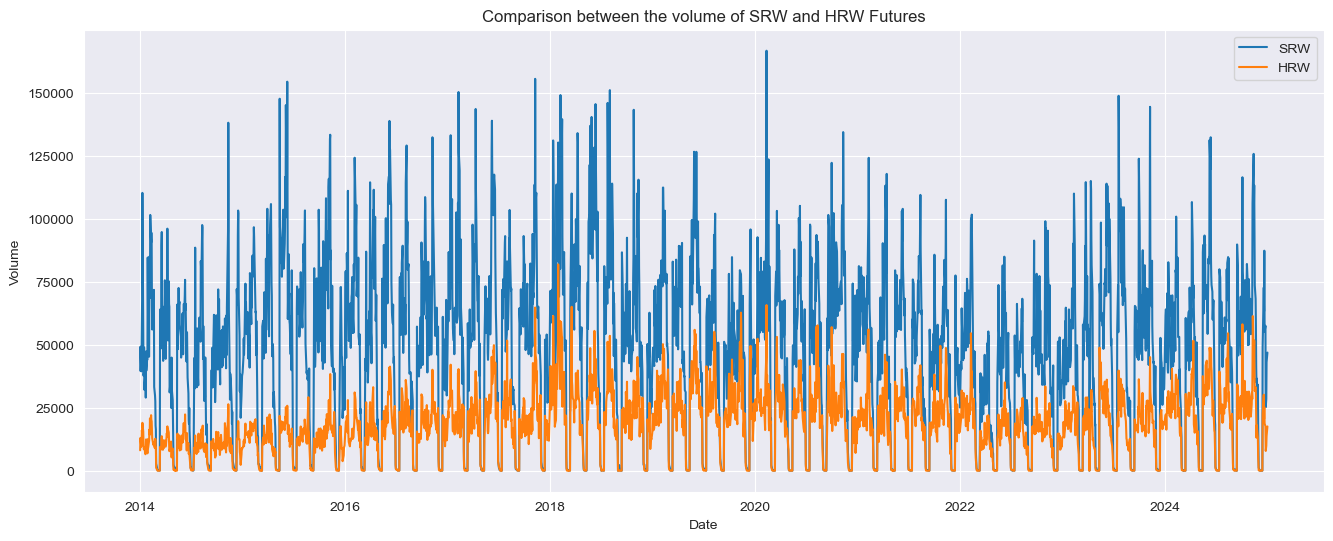

In [15]:
sns.lineplot(x = 'Date', y = 'Close', data = SRW_data, label = "SRW")
sns.lineplot(x = 'Date', y = 'Close', data = HRW_data, label = "HRW")
plt.show()

plt.figure(figsize=(16, 6))
plt.title("Comparison between the volume of SRW and HRW Futures")
sns.lineplot(x = 'Date', y = 'Volume', data = SRW_data, label = "SRW")
sns.lineplot(x = 'Date', y = 'Volume', data = HRW_data, label = "HRW")
plt.show()
##%% md

##%% md
### Volatility analysis
##%%
plt.figure(figsize=(16, 6))

In [ ]:
plt.show()

plt.figure(figsize=(16, 6))
sns.lineplot(x = 'Date', y = '7D_Volatility', data = SRW_data)
plt.show()

SRW_data_without_2022 = SRW_data[SRW_data['Year'] != 2022]
plt.figure(figsize=(16, 6))
sns.lineplot(x = 'DTE', y = '7D_Volatility', data = SRW_data_without_2022, hue = 'Year', palette='Set1')
##%% md
### Other wheat indexes
##%%
# This index data is almost a scaled version of the wheat price

ticker = 'WEAT'
data = yf.Ticker(ticker).history(start ="2014-01-01", end ="2024-12-31")

plt.figure(figsize = (16,6))
sns.lineplot(x = 'Date', y = 'Close', data = data, label = "index")
# sns.lineplot(x = 'Date', y = 'Close', data = SRW_data, label = "SRW")

### Comparing futures with different expiry month

In [ ]:
march = yf.Ticker("ZWH25.CBT").history(start ="2025-01-01")

may = yf.Ticker("ZWK25.CBT").history(start ="2025-01-01")
july = yf.Ticker("ZWN25.CBT").history(start ="2025-01-01")
sept = yf.Ticker("ZWU25.CBT").history(start ="2025-01-01")
dec = yf.Ticker("ZWZ25.CBT").history(start ="2025-01-01")


plt.figure(figsize = (16,6))
sns.lineplot(x = 'Date', y = 'Close', data = march, label = "march")
sns.lineplot(x = 'Date', y = 'Close', data = may, label = "may")
sns.lineplot(x = 'Date', y = 'Close', data = july, label = "july")
sns.lineplot(x = 'Date', y = 'Close', data = sept, label = "sept")
sns.lineplot(x = 'Date', y = 'Close', data = dec, label = "dec")

### Contango Market Structure
- **Contango** is a market condition where futures contracts with later expiration dates trade at higher prices than near-term contracts.

**Why Does Contango Happen? (Cost-of-Carry Model)**:
1. Storage Costs
    - If wheat is stored in a CME-approved warehouse, the holder incurs storage fees.
    - Since May wheat futures require holding wheat longer than March, storage costs increase over time, contributing to a higher May price.
2. Financing Costs (Interest Rates)
3. Insurance & Transportation Costs
    - If wheat is stored for longer periods, it requires insurance against spoilage, theft, or contamination.
4. Market Expectations
    - If traders expect wheat prices to rise in the future, they may bid up prices for later contracts.